# 문제 정의

* 오락실의 하키 게임을 SW로 구현 (설명 참고) <br>
Windows 프로그램 / C 언어 (C++등 다른 언어 안됨) <br>
한쪽은 사람이 키보드로 진행하고 다른 한쪽은 컴퓨터가 자동으로 알고리즘으로 진행함  (업 다운 키)<br>
스테이지가 올라가거나, 랠리가 한번씩 더해질수록 속도가 빨라지게 함.<br>
컴퓨터쪽의 Bar 움직임 속도를 다르게 설정하여 난이도를 정하게 함. (난이도는 스테이지가 올라가도 유지됨) <br>
사람쪽의 Bar 움직임은 적당한 속도로 일정하게 고정함. 최대한 단순하지만 Windows App 으로 진행함.<br>
4,5월 수업이 도움이 될 수도 있고, 도움없이 진행할 수도 있음. <br>
chatGPT 포함한 외부 자료 사용 절대 금함. 특성을 이미 잘 알고 있으므로,  사용흔적이 보이면 0점 처리<br>

# 하키 게임 규칙

* user의 목숨(save)은 3개로 설정하였습니다.
* ball이 user쪽 벽에 닿으면 목숨은 -1씩 감소합니다.
* ball이 user bar에 튕기고, computer bar에 튕기거나 computer bar쪽 벽에 튕기면 랠리 1번입니다.
* 랠리 1번하면, stage가 +1 증가합니다.
* 만약 ball이 computer bar에 튕긴 랠리였다면, ball의 이동속도가 증가합니다.
* 만약 ball이 computer bar 벽에 튕긴 랠리였다면, stage만 증가하고 ball의 이동속도는 증가하지 않습니다.
* save가 0이 된다면, 증가한 stage를 출력해주며 프로그램이 종료됩니다.
* stage 수가 높은 사람이 승리하게 된 것입니다.

# 하키 게임 구현 구상

1. 프로그램을 실행시키면, `초기화면`이 실행됩니다.
초기화면에서 숫자 키패드를 입력하여 난이도를 선택할 수 있습니다.
    - 숫자 1을 입력하면, Level1입니다. -> 컴퓨터쪽 Bar의 움직임의 속도가 느립니다. 
    - 숫자 2을 입력하면, Level2입니다. -> 컴퓨터쪽 Bar의 움직임의 속도가 보통입니다.
    - 숫자 3을 입력하면, Level3입니다. -> 컴퓨터쪽 Bar의 움직임의 속도가 빠릅니다.

2. `초기화면`에서 1, 2, 3 중 하나를 입력했다면 게임화면으로 넘어가며 즉시 게임이 시작됩니다.

3. `게임화면`의 중앙위쪽에는 <u>Stage정보(Level정보)</u>가 출력됩니다.
4. `게임화면`의 오른쪽위쪽에는 <u>user의 목숨(save)</u>가 출력됩니다.
5. 랠리는 user bar 맞고 computer bar를 맞거나 cmoputer 벽에 맞은 경우이므로,<br> 처음에 ball은 user쪽으로 움직입니다. (ball의 초기 offsetX > 0, offsetY > 0)
6. user 벽에 ball이 닿으면 목숨(save)은 -1 감소하고, 0이 되면 게임이 종료되며 결과화면이 실행됩니다.
7. `결과화면`의 중앙에 획득한 Stage 수를 출력합니다.


* `초기화면` : 
    * 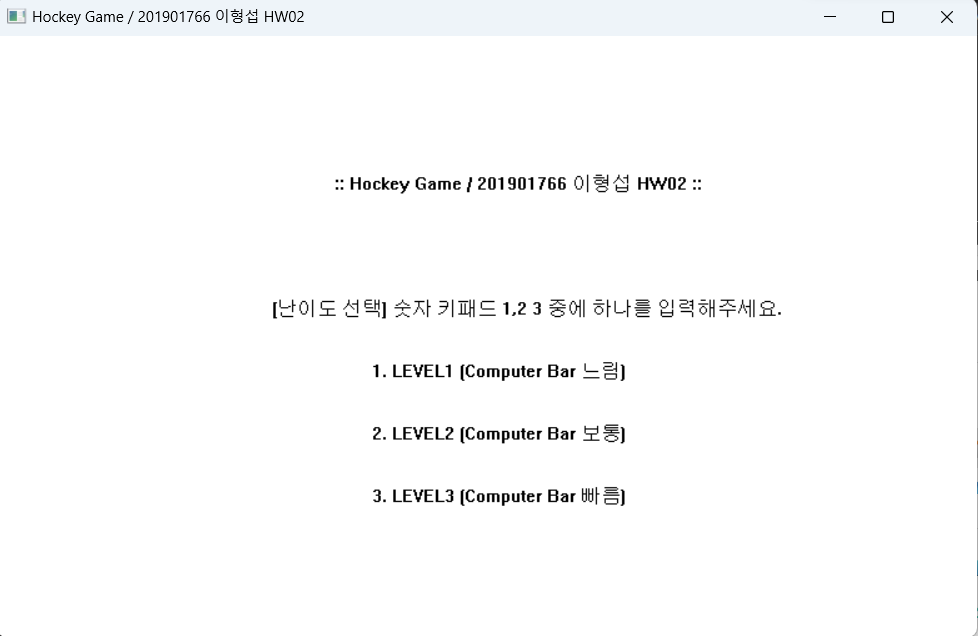
    * 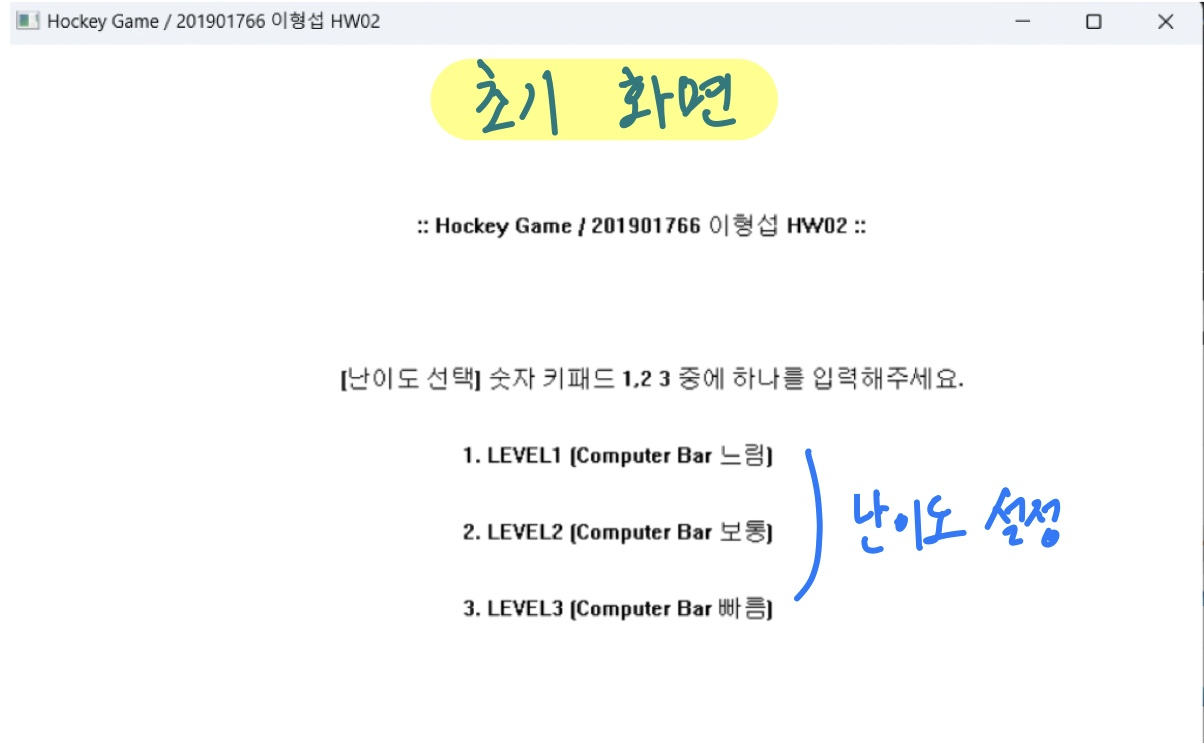
* `게임화면` :
    * 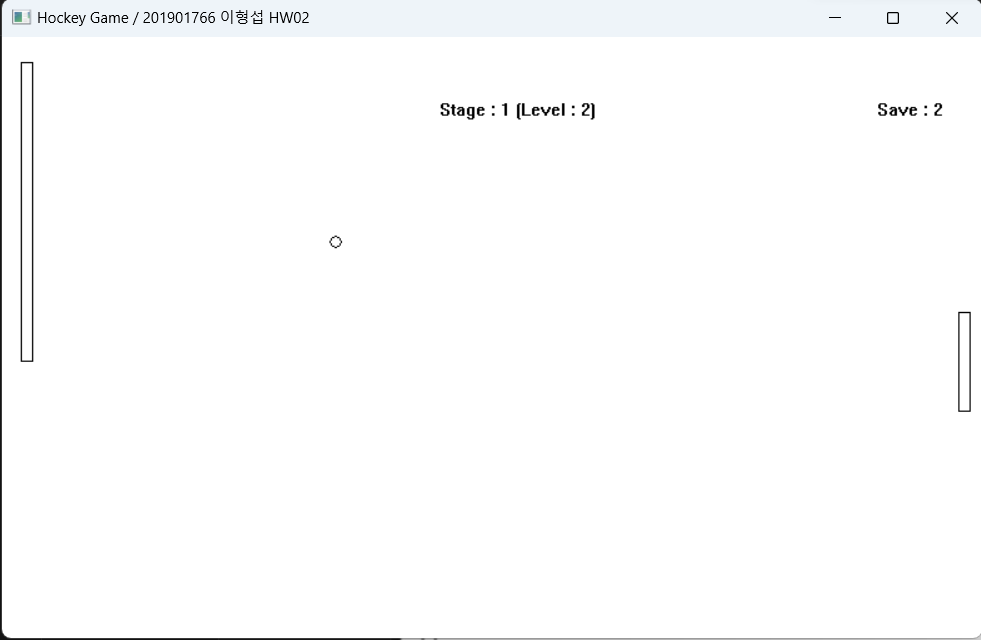
    * 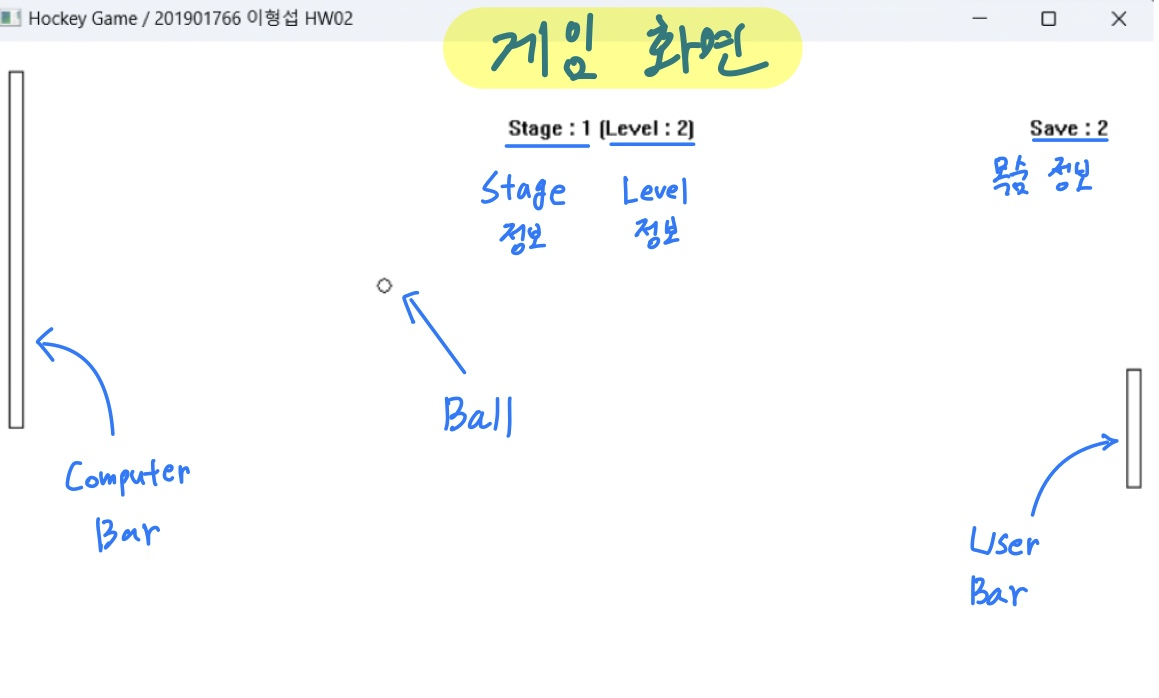
* `결과화면` : 
    * 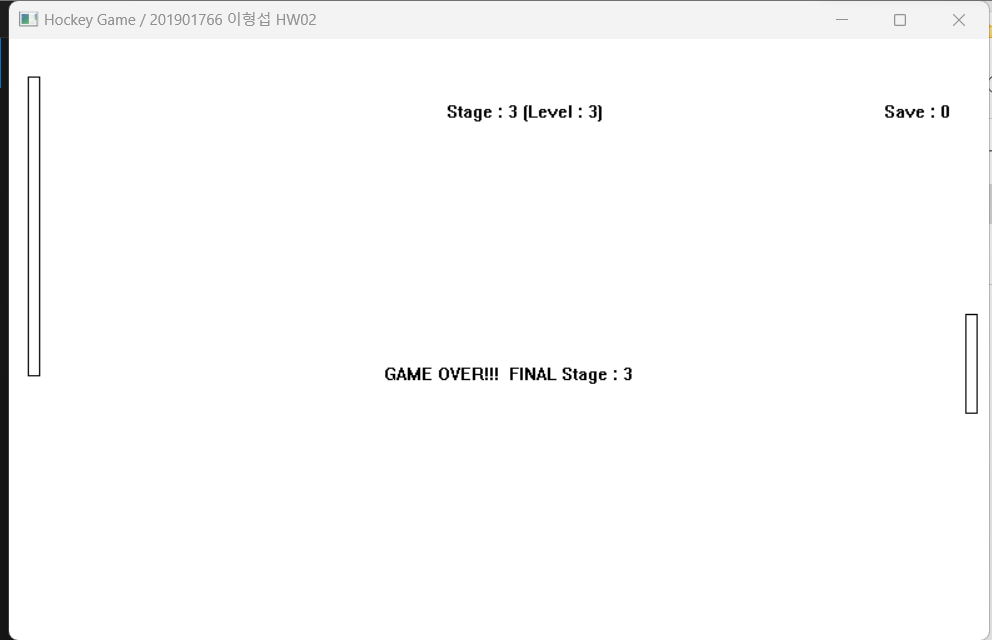
    * 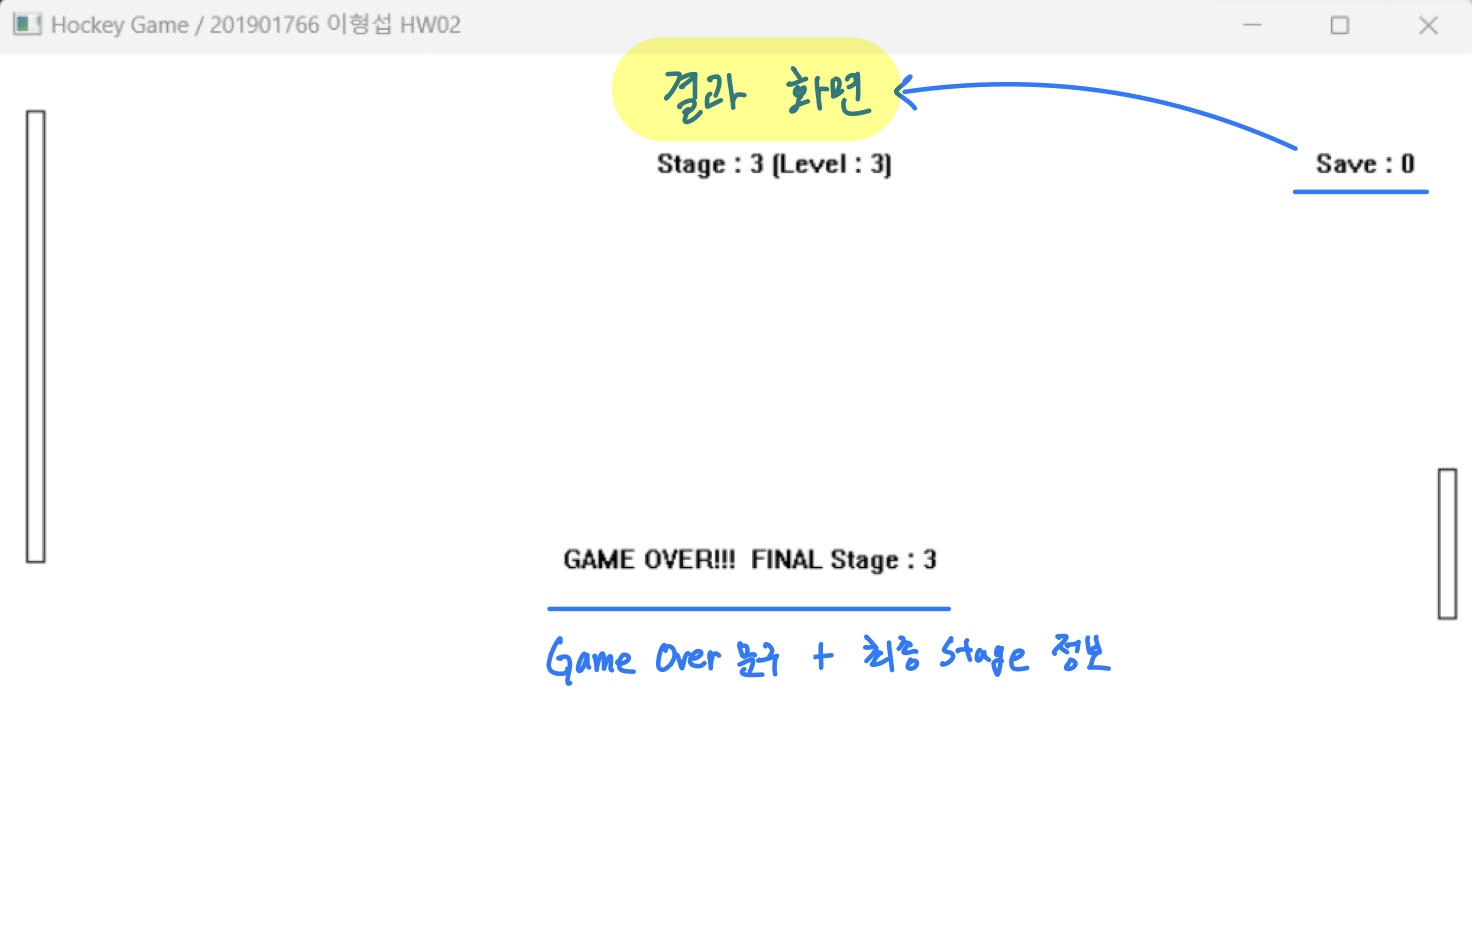

## Reference
* reference1 : https://ehpub.co.kr/7-%ec%b2%ab-%eb%b2%88%ec%a7%b8-%ec%8b%a4%ec%8a%b5-%eb%8f%84%ed%98%95-%ec%9d%b4%eb%8f%99-%ec%8b%9c%ed%82%a4%ea%b8%b0/
* reference2 : https://pang92.tistory.com/241
* reference3 :  https://m.blog.naver.com/pkk1113/90155000817
* reference4 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wkdghcjf1234&logNo=220554975432

## CODE 설명

### header file, Macro, 전역변수 정의

* reference1을 통해 Windown API를 사용할 수 있게 <Windows.h> header file을 사용
   - window 창을 띄워 game animation을 구현할 것이므로, visual studio 환경에서 프로젝트 속성 > 시스템 > 콘솔 대신 window로 바꿔야 했습니다.

* 띄워지는 window창의 넓이, 높이를 define
* computer, user bar의 넓이, 높이, 속도(offset)을 define
* 초기화면에서 사용자가 입력할 LEVEL 정보 define
* ball의 반지름, 속도(x축 방향 속도, y축 방향 속도) define

In [ ]:
#include <Windows.h>
#define MY_DRAW_WND (TEXT("하키 게임"))
#define WINDOW_LENGTH 800   // 띄워지는 window창의 X축 길이
#define WINDOW_HEIGHT 500   // 띄워지는 window창의 Y축 길이

#define STICK_LENGTH 10     // com, user 둘 다 Stick의 X축 길이를 같게
#define STICK_HEIGHT 80     // com, user 둘 다 Stick의 Y축 길이를 같게
#define STICK_OFFSET 10     // user stick의 offset

#define BALL_RADIUS 5       // Ball의 반지름
#define BALL_OFFSETX 3      // Ball의 초기 offset x
#define BALL_OFFSETY 3      // Ball의 초기 offset y

int level = 1;  // level = 1 -> 초보, 2 -> 중급, 3 -> 상급 (나중에 초기화면에서 입력받는 숫자)
int stage = 1;  // stage 정보
int save = 3;   // user의 남은 목숨 정보
BOOL end_flag = FALSE;
BOOL gameStart = FALSE;

### 함수 선언

* 사용할 모든 함수들을 선언합니다

In [ ]:

// 함수 선언
LRESULT CALLBACK MyWndProc(HWND hWnd, UINT iMessage, WPARAM wParam, LPARAM lParam);
void RegWindowClass();
void MessageLoop();
void DrawStick(HWND hWnd, HDC hdc, HPEN hPen, HBRUSH hBrush, LPRECT prt);
void DrawBall(HWND hWnd, HDC hdc, HPEN hPen, HBRUSH hBrush);
void OnPaint(HWND hWnd);
void OnDestroy(HWND hWnd);
DWORD WINAPI ballThreadUpDown(LPVOID lpParameter);
DWORD WINAPI comThreadUpDown(LPVOID lpParameter);
DWORD WINAPI userThreadUpDown(LPVOID lpParameter);
void DrawDiagram(HWND hWnd, HDC hdc, HPEN hPen, HBRUSH hBrush, LPRECT prt); //그리기 작업


### 구조체 선언, 변수 생성

* computer, user bar를 만들기 위해 Windows에서 제공하는 RECTANGULAR structure를 사용합니다.
   * 이를 typedef로 STICK이라는 자료형명을 붙여줍니다.
   * 이어서 user bar의 left, top, right, bottom, offset 정보를 입력하여 초기화해줍니다.
   * 이어서 computer bar의 left, top, right, bottom, offset 정보를 입력하여 초기화해줍니다.

* ball을 만들기 위해 Windows에서 제공하는 Ellipse structure를 사용할 것인데, <br>
우선 Ellipse 사용을 위한 매개변수들을 저장할 CIRCLE structure를 BALL이라는 <br>자료형명(typedef)을 이용하여 생성해줍니다.

In [ ]:

typedef struct RECTANGULAR { // reference : https://pang92.tistory.com/241
    RECT pos; // left : 사각형 왼쪽 위 모서리에 대한 x좌표
              // top : 사각형 왼쪽 위 모서리에 대한 y좌표
              // right : 사각형 오른쪽 아래 모서리에 있는 x좌표
              // bottom : 사각형 오른쪽 아래 모서리에 대한 y좌표
    float offset;
}STICK;

typedef struct CIRCLE {
    LONG left;
    LONG top;
    LONG right;
    LONG bottom;
    int offsetX;
    int offsetY;
}BALL;

// user stick 초기화
STICK user = { {WINDOW_LENGTH - 35, WINDOW_HEIGHT / 2 - STICK_HEIGHT / 2, WINDOW_LENGTH - 35 + STICK_LENGTH,  WINDOW_HEIGHT / 2 + STICK_HEIGHT / 2}, STICK_OFFSET };
// com stick 초기화
STICK com = { {15, WINDOW_HEIGHT / 2 - STICK_HEIGHT * 3, 15 + STICK_LENGTH, WINDOW_HEIGHT / 2 + STICK_HEIGHT * 3}, 5 };
// ball 초기화 (나중에 사용자의 level 선택에 따라 ball.offset을 바꿔줄 것이다)
BALL ball = { WINDOW_LENGTH / 2 - BALL_RADIUS, WINDOW_HEIGHT / 2 - BALL_RADIUS, WINDOW_LENGTH / 2 + BALL_RADIUS, WINDOW_HEIGHT / 2 + BALL_RADIUS, BALL_OFFSETX, BALL_OFFSETY };

### Thread 변수 선언

* 나중에 사용할 thread를 아직 생성하진 않고, 선언만 해둡니다.
    * user의 키보드 위, 아래 입력을 받아 움직이는 animation을 구현할 userThread 변수 선언.
    * user의 input 없이 계속해서 위, 아래로 움직이는 computer bar의 animation을 구현할 comThread 변수 선언.
    * user bar 또는 computer bar 또는 벽에 튕기며 이동하는 animiation을 구현할 ballThread 변수 선언.

In [ ]:
HANDLE userThread = NULL;  // user thread
HANDLE comThread = NULL;   // com thread
HANDLE ballThread = NULL;  // ball thread 

### RegWindowClass() 

* RegWindowClass() 함수는 animation을 위해 window 창을 띄울 것인데, <br>
그 window창을 띄우기 위해 window에 대한 속성, 값들을 갖고 있는 Class를 만드는 함수입니다. 


In [ ]:
void RegWindowClass()
{
    WNDCLASS wndclass = { 0 };
    wndclass.hbrBackground = (HBRUSH)GetStockObject(WHITE_BRUSH); // window창 배경색 설정
    wndclass.hCursor = LoadCursor(0, IDC_ARROW);                  // 마우스 커서 핸들
    wndclass.hIcon = LoadIcon(0, IDI_APPLICATION);                // 아이콘 핸들
    wndclass.hInstance = GetModuleHandle(0);                      // 자신 모듈의 인스턴스 핸들
    wndclass.lpfnWndProc = MyWndProc;                             // 윈도우 콜백 프로시저
    wndclass.lpszClassName = MY_DRAW_WND;                         // 클래스 이름 - 클래스 구분자
    wndclass.style = CS_DBLCLKS;                                  // 클래스 종류

    RegisterClass(&wndclass); // 윈도우 클래스 등록
}

### initialWindow()

*  initialWindow() 함수는 제가 정의한 함수입니다.
* 해당 함수는 난이도(Level)을 설정하기 위하여 초기에 게임이 실행 되기 전에<br>
사용자의 1, 2, 3 입력을 받아 그 수에 맞는 난이도를 세팅해주기 위해 <br>
User Interface를 구현한 함수입니다.

In [ ]:
// 초기 화면 그려주는 함수
void initialWindow(HWND hWnd)
{
    // 하키 게임 Title
    HDC hdc_game = GetDC(hWnd);
    TextOut(hdc_game, WINDOW_LENGTH / 2 - 130, WINDOW_HEIGHT / 2 - 150, TEXT(":: Hockey Game / 201901766 이형섭 HW02 ::"), lstrlen(TEXT(":: Hockey Game / 201901766 이형섭 HW02 ::")));
    ReleaseDC(hdc_game, hdc_game);

    // 난이도 선택 설명 문구
    HDC hdc_explain = GetDC(hWnd);
    TextOut(hdc_explain, WINDOW_LENGTH / 2 - 180, WINDOW_HEIGHT / 2 - 50, TEXT("[난이도 선택] 숫자 키패드 1,2 3 중에 하나를 입력해주세요."), lstrlen(TEXT("[난이도 선택] 숫자 키패드 1,2 3 중에 하나를 입력해주세요.")));
    ReleaseDC(hdc_explain, hdc_explain);

    // 초급
    HDC hdc_low = GetDC(hWnd);
    TextOut(hdc_low, WINDOW_LENGTH / 2 - 100, WINDOW_HEIGHT / 2, TEXT("1. LEVEL1 (Computer Bar 느림)"), lstrlen(TEXT("1. LEVEL1 (Computer Bar 느림)")));
    ReleaseDC(hdc_low, hdc_low);
    // 중급
    HDC hdc_mid = GetDC(hWnd);
    TextOut(hdc_mid, WINDOW_LENGTH / 2 - 100, WINDOW_HEIGHT / 2 + 50, TEXT("2. LEVEL2 (Computer Bar 보통)"), lstrlen(TEXT("2. LEVEL2 (Computer Bar 보통)")));
    ReleaseDC(hdc_mid, hdc_mid);
    // 고급
    HDC hdc_high = GetDC(hWnd);
    TextOut(hdc_mid, WINDOW_LENGTH / 2 - 100, WINDOW_HEIGHT / 2 + 100, TEXT("3. LEVEL3 (Computer Bar 빠름)"), lstrlen(TEXT("3. LEVEL3 (Computer Bar 빠름)")));
    ReleaseDC(hdc_high, hdc_high);
}

### WinMain()

* WinMain() 함수는 C언어의 main() 함수와 유사한 기능을 합니다.
* 우선 앞서 살펴본 RegWindowClass() 함수를 통해 window 창을 띄우기 위해 Window 객체를 생성합니다.
* 그리고 나서 window 창의 이름, title 정보, 띄워질 위치 등을 설정해줍니다.
* window 창에 대한 객체와 설정이 끝났으면 시각화해줍니다.
* 그리고 나서 게임 초기화면 (initialWindow)을 출력하여 Level 선택에 대한 UI를 제공합니다.
* 사용자가 Level(1, 2, 3)을 입력할 때까지 while()문에서 기다립니다.
* 사용자가 Level(1, 2, 3)을 입력했다면, 그에 해당하는 level 변수를 초기화해줍니다. (com.offset = level * 5;) <br>
이 level 변수는 추후 computer bar의 offset(속도)를 결정지을 변수로 사용됩니다. <br>
또한 level 변수의 값을 통해 게임 화면에서 Level 정보를 출력할 때 사용됩니다.
* 초기화면에서 빠져나오면, 게임화면에 들어가기 바로 직전에 thread를 생성하여<br>
ball, computer, user를 움직이게 하는 thread를 각각 하나씩 생성합니다.

* 마지막으로 MessageLoop()를 돌며 이벤트(message) 발생을 계속해서 확인하여 처리합니다.

In [ ]:
INT APIENTRY WinMain(HINSTANCE hIns, HINSTANCE hPrev, LPSTR cmd, INT nShow)
{
    RegWindowClass(); //윈도우 클래스 속성 설정 및 등록

    //윈도우 인스턴스 생성
    HWND hWnd = CreateWindow(
        MY_DRAW_WND,         // 클래스 이름
        TEXT("Hockey Game / 201901766 이형섭 HW02"),   // window name
        WS_OVERLAPPEDWINDOW, // window style
        0, 0, WINDOW_LENGTH, WINDOW_HEIGHT,// window창이 띄워질 laptop화면의 x축 위치, y축 위치, window창의 x축 길이, y축 길이
        0,      // 부모 윈도우 핸들  (HWND hWndParent)
        0,      // 메뉴 핸들 (HMENU hMenu)
        hIns,   // 인스턴스 핸들 (HANDLE hInstance)
        0);     // 생성 시 전달 인자 (LPVOID lpParam)


    ShowWindow(hWnd, nShow); // 윈도우 인스턴스 시각화, SW_SHOW(시각화), SW_HIDE(비시각화)  
    initialWindow(hWnd);

    // 초기화면을 띄우고나서 1, 2, 3 입력을 대기한다
    MSG msg = {0};
    while (GetMessage(&msg, NULL, 0, 0)) {
        TranslateMessage(&msg);
        DispatchMessage(&msg);

        // 사용자가 1, 2, 3 중에 입력한 경우 해당 값을 level 변수에 저장하고 thread를 생성
        if (msg.message == WM_CHAR) {
            if (msg.wParam == '1') {
                level = 1;
            }
            else if (msg.wParam == '2') {
                level = 2;
            }
            else if (msg.wParam == '3') {
                level = 3;
            }
            else { // 1, 2, 3이 아닌 키가 눌리면 gameStart, while문 탈출하지 못하도록
                continue;
            }
            gameStart = TRUE;
            break;
        }
    }

    // com stick 초기화 (사용자가 고른 난이도로 com stick의 속도를 다르게 설정)
    com.offset = level * 5;

    // 공, user, com 각각의 thread 생성
    if (ballThread == NULL) {
        ballThread = CreateThread(NULL, 0, ballThreadUpDown, NULL, 0, 0);
    }
    if (userThread == NULL) {
        userThread = CreateThread(NULL, 0, userThreadUpDown, NULL, 0, 0);
    }
    if (comThread == NULL) {
        comThread = CreateThread(NULL, 0, comThreadUpDown, NULL, 0, 0);
    }

    MessageLoop(); // 메시지 루프
}

### MessageLoop()

* 앞서 언급했듯이, MessageLoop()은 Window에서 발생한 event(message)를 처리하기 위한 함수입니다.
* 이 루프를 돌며 사용자의 save(목숨)변수가 0이 되었다면, Loop를 멈추고 게임을 종료해야 하기 때문에 end_flag를 True로 변경해줍니다.

In [ ]:
void MessageLoop()
{
    MSG Message;
    while (GetMessage(&Message, 0, 0, 0)) // 메시지 루프에서 메시지 꺼냄(WM_QUIT이면 FALSE 반환)
    {
        TranslateMessage(&Message);       // WM_KEYDOWN이고 키가 문자 키일 때 WM_CHAR 발생
        DispatchMessage(&Message);        // 콜백 프로시저가 수행할 수 있게 디스패치 시킴
    }
    // user의 목숨이 0개면 종료해야 하기 때문에 flag를 TRUE로 변경
    if (save == 0) {
        end_flag = TRUE;
    }
}

### ballThreadUpDown()

* 앞서 작성했듯이, ballThread는 ball의 animation을 구현하기 위한 thread입니다.
* ballThread는 ballThreadUpDown() 함수를 반복하여 실행합니다.

In [ ]:
// ball move 함수
DWORD WINAPI ballThreadUpDown(LPVOID lpParameter) {
    HWND hWnd = (HWND)lpParameter; // hWnd 핸들을 저장

    while (1)
    {
        // 공을 해당 속도에 맞게 x, y 축 방향으로 이동시킴
        ball.top += ball.offsetY;
        ball.bottom += ball.offsetY;
        ball.left += ball.offsetX;
        ball.right += ball.offsetX;

        // 공의 top 위치가 window 위쪽을 벗어나면, 위쪽 벽에 위치시키고, y축 속도의 방향을 반대로
        if (ball.top <= 0) {
            ball.top = 0;
            ball.bottom = 2 * BALL_RADIUS;
            ball.offsetY = -1 * ball.offsetY;
        }
        // 공의 bottom 위치가 window 아래쪽을 벗어나면, 아래쪽 벽에 위치시키고, y축 속도의 방향을 반대로
        if (ball.bottom >= WINDOW_HEIGHT && ball.offsetY > 0) {
            ball.bottom = WINDOW_HEIGHT;
            ball.top = ball.bottom - (2 * BALL_RADIUS);
            ball.offsetY = -1 * ball.offsetY;
        }
        // 공의 left 위치가 window 왼쪽을 벗어나면, 왼쪽 벽에 위치시키고, x축 속도의 방향을 반대로
        if (ball.left <= 0) {
            ball.left = 0;
            ball.right = 2 * BALL_RADIUS;
            ball.offsetX = -1 * ball.offsetX;
            stage += 1;  // ball이 왼쪽 벽에 닿아도 stage 증가. 하지만 공 속도는 그대로
        }
        // 공의 right 위치가 window 오른쪽을 벗어나면, 오른쪽 벽에 위치시키고, x축 속도의 방향을 반대로
        if (ball.right >= WINDOW_LENGTH) {
            ball.left = WINDOW_LENGTH - (2 * BALL_RADIUS);
            ball.right = WINDOW_LENGTH;
            ball.offsetX = -1 * ball.offsetX;
            save -= 1;  // 오른쪽 벽에 튕기면, user가 못 받은 것이니까 save--
        }

        // ball이 com stick에 닿으면, 튕김 (속도 증가. 등차 수열식으로..)
        if (ball.offsetX < 0 && ball.left <= com.pos.right &&  ball.bottom >= com.pos.top &&  ball.top <= com.pos.bottom)
        {
            ball.offsetX = -ball.offsetX + BALL_OFFSETX / 2; // 그냥 더해주면 급속도로 빨라지기 때문에 /2 연산 결과를 더해준다
            if (ball.offsetY > 0) {
                ball.offsetY += BALL_OFFSETY / 3; // window의 y축 비율이 더 작으니까 속도도 그 비율로 맞춰주기 위해 y축 방향 속도를 더 작게 더해준다
            }
            else {
                ball.offsetY -= BALL_OFFSETY / 3;
            }
            ball.left = com.pos.right; // 공을 스틱에서 밀어내기
            ball.right = ball.left + 2 * BALL_RADIUS;
            stage += 1;  // stage 증가
        }

        // ball이 user stick에 닿으면, 튕김
        if ((ball.right >= user.pos.left) && (ball.bottom >= user.pos.top) && (ball.top <= user.pos.bottom)) {
            ball.offsetX = -1 * ball.offsetX;
        }

        InvalidateRect(hWnd, NULL, TRUE); // ball 위치 update
        Sleep(10);
    }
}

### comThreadUpDown()

* 앞서 작성했듯이, comThread는 computer bar의 animation을 구현하기 위한 thread입니다.
* comThread는 comThreadUpDown() 함수를 반복하여 실행합니다.

In [ ]:
// com stick move 함수
DWORD WINAPI comThreadUpDown(LPVOID lpParameter)
{
    HWND hWnd = (HWND)lpParameter; // hWnd 핸들을 저장

    while (1)
    {
        // computer bar를 해당 속도에 맞게 x, y 축 방향으로 이동시킴
        com.pos.top += com.offset;
        com.pos.bottom += com.offset;

        // computer bar의 top이 window를 벗어나면, window 위에 위치 시키고, computer bar의 속도의 y축 방향을 반대로
        if (com.pos.top <= 0) {
            com.pos.top = 0;
            com.pos.bottom = 3 * STICK_HEIGHT;
            if (com.offset < 0) {
                com.offset = -1 * com.offset;
            }
        }
        // computer bar의 bottom이 window를 벗어나면, window 아래에 위치 시키고, computer bar의 속도의 y축 방향을 반대로
        else if (com.pos.bottom >= WINDOW_HEIGHT) {
            com.pos.top = WINDOW_HEIGHT - 3 * STICK_HEIGHT;
            com.pos.bottom = WINDOW_HEIGHT;
            if (com.offset > 0) {
                com.offset = -1 * com.offset;
            }
        }
        InvalidateRect(hWnd, NULL, TRUE); // com bar 위치 update
        Sleep(10);
    }
}

In [ ]:
// user stick move 함수
DWORD WINAPI userThreadUpDown(LPVOID lpParameter)
{
    HWND hWnd = (HWND)lpParameter; // hWnd 핸들을 저장
    while (1)
    {
        // https://m.blog.naver.com/pkk1113/90155000817
        // 만약 위쪽 방향키가 눌렸다면, 이동
        if (GetAsyncKeyState(VK_UP) & 0x8000)
        {
            if (user.pos.top > 0) {
                user.pos.top -= user.offset;
                user.pos.bottom -= user.offset;
            }
            InvalidateRect(hWnd, NULL, TRUE); // up한 위치로 이동시킴. (update)
        }
        // 만약 아래 방향키가 눌렸다면, 이동
        else if (GetAsyncKeyState(VK_DOWN) & 0x8000)
        {
            if (user.pos.bottom + STICK_HEIGHT / 2 < WINDOW_HEIGHT) {
                user.pos.top += user.offset;
                user.pos.bottom += user.offset;
            }
            InvalidateRect(hWnd, NULL, TRUE); // down한 위치로 이동시킴. (update)
        }
        Sleep(20);
    }
}

### MyWndProc()

* MyWndProc() 함수는 message(event)를 처리하기 위한 callback 함수이다.
* 아래의 3가지 case에 대한 event를 처리하고, 그 외에는 DefWindowProc()를 처리합니다.

In [ ]:
LRESULT CALLBACK MyWndProc(HWND hWnd, UINT iMessage, WPARAM wParam, LPARAM lParam)
{
    switch (iMessage)
    {
    case WM_CLOSE: // 창 닫기 버튼 누르면, 종료
        DestroyWindow(hWnd);
        break;
    case WM_DESTROY:
        PostQuitMessage(0);
        break;
    case WM_PAINT:
        OnPaint(hWnd);
        break;
    default:
        return DefWindowProc(hWnd, iMessage, wParam, lParam);
    }
    return 0;
}

### DrawStick()

* DrawStick() 함수는 앞서 정의한 RECTANGULAR structure인<br>
 computer bar, user bar를 그리기 위한 함수이다.
* hBrush를 통해 해당 RECT의 색깔을 지정할 수 있지만, overhead가 커서 게임 진행에 delay가 생기는 것을 확인하여 hBrush를 지정하지 않았습니다. (추후 코드에서 볼 수 있습니다)

In [ ]:
// com, user stick 그리기
void DrawStick(HWND hWnd, HDC hdc, LPRECT prt, HBRUSH hBrush)
{
    HBRUSH oBrush; // DC에 기존 선택 브러쉬 핸들 기억할 변수    
    oBrush = (HBRUSH)SelectObject(hdc, hBrush); // 입력 인자로 전달받은 브러쉬를 DC에 선택

    Rectangle(hdc, prt->left, prt->top, prt->right, prt->bottom); // stick 그리기

    SelectObject(hdc, oBrush); // 기존 선택 브러쉬를 DC에 선택
}

### DrawBall()

* DrawBall() 함수는 앞서 정의한 CIRCLE structure인<br>
 ball을 그리기 위한 함수이다.
* hBrush를 통해 해당 RECT의 색깔을 지정할 수 있지만, overhead가 커서 게임 진행에 delay가 생기는 것을 확인하여 hBrush를 지정하지 않았습니다. (추후 코드에서 볼 수 있습니다)

In [ ]:

// ball 그리기
void DrawBall(HWND hWnd, HDC hdc, HBRUSH hBrush)
{
    HBRUSH oBrush; // DC에 기존 선택 브러쉬 핸들 기억할 변수    
    oBrush = (HBRUSH)SelectObject(hdc, hBrush); // 입력 인자로 전달받은 브러쉬를 DC에 선택

    Ellipse(hdc, ball.left, ball.top, ball.right, ball.bottom); // ball 그리기

    SelectObject(hdc, oBrush); // 기존 선택 브러쉬를 DC에 선택
}


### OnPaint()

* OnPaint() 함수는 WM_PAINT event발생 시 처리되는 함수입니다.
* window 창에 그림을 그려주는 함수라고 생각할 수 있습니다.
* 앞서 정의한 DrawStick(), DrawBall() 에서 user bar, computer bar, ball에 대한 update 정보를 그려줄 뿐만 아니라, <br>
TextOut()을 통해 현재 Stage, Level, save 에 대한 정보도 출력해줍니다
* 또한 초기화면엔은 이와 같은 것들이 그려지지 않고 Level 선택에 대한 UI만 그려져야 하므로, gameStart flag가 TRUE일 때만 그려지게 하였습니다.

In [ ]:
// WM_PAINT 메시지 처리기
void OnPaint(HWND hWnd)
{
    if (gameStart == TRUE) {
        PAINTSTRUCT ps;
        HDC hdc = BeginPaint(hWnd, &ps); // DC 발급

        DrawStick(hWnd, hdc, &com, WHITE_BRUSH);  // com
        DrawStick(hWnd, hdc, &user, WHITE_BRUSH); // user
        DrawBall(hWnd, hdc, WHITE_BRUSH);
        TCHAR stage_level_text[256] = TEXT("");
        wsprintf(stage_level_text, TEXT("Stage : %d (Level : %d)"), stage, level);
        TextOut(hdc, WINDOW_LENGTH / 2 - 50, 50, stage_level_text, lstrlen(stage_level_text));
        TCHAR save_text[256] = TEXT("");
        wsprintf(save_text, TEXT("Save : %d"), save);
        TextOut(hdc, WINDOW_LENGTH - 100, 50, save_text, lstrlen(save_text));


        if (end_flag == TRUE || save == 0) {
            TCHAR end_text[256] = TEXT("");
            wsprintf(end_text, TEXT("GAME OVER!!!  FINAL Stage : %d"), stage);
            TextOut(hdc, WINDOW_LENGTH / 2 - 100, WINDOW_HEIGHT / 2, end_text, lstrlen(end_text));

            Sleep(5000);

            PostQuitMessage(0); // 메시지 큐에 WM_QUIT 메시지를 붙임
            return 0; // 종료
        }
        EndPaint(hWnd, &ps); // DC 해제
    }
}

### OnDestroy()

* OnDestroy() 함수는 WM_DESTROY event(message)발생 시 처리되는 함수입니다.
* window 창을 없애어 프로그램을 종료시키는 역할을 합니다.

In [ ]:
// WM_DESTROY 메시지 처리기
void OnDestroy(HWND hWnd)
{
    PostQuitMessage(0); // 메시지 큐에 WM_QUIT 메시지를 붙임
}